In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pic-for-test/1_D0ms2ujp1SNyMQg7kSg6cw.png
/kaggle/input/model-architecture/model_architecture.py
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


 #  Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import importlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
import time    
%matplotlib inline
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

2024-04-03 13:43:30.368907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 13:43:30.368965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 13:43:30.370459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# load data

In [3]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label=train["label"]

In [6]:
label.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

# data splitting

In [7]:
X = train.drop(columns="label")
y = train["label"]
X_test = test
print("x_train shape: ", X.shape)
print("y_train shape: ", y.shape)
print("x_test shape: ", X_test.shape)

x_train shape:  (42000, 784)
y_train shape:  (42000,)
x_test shape:  (28000, 784)


In [8]:

# Assuming you have X and y defined already

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (33600, 784)
X_val shape: (8400, 784)
y_train shape: (33600,)
y_val shape: (8400,)


# data_preprocessing

In [9]:
test = X_test.to_numpy()
X_test = test / 125.0
X_test = X_test.reshape(-1, 28, 28, 1)  # For grayscale images
print("X_test shape:", X_test.shape)

X_test shape: (28000, 28, 28, 1)


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_val, y_train, and y_val defined as Pandas DataFrames

# Transform X_train, X_val, y_train, and y_val to NumPy arrays using iloc
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

# One-hot encoding for y_train and y_val
num_classes = len(np.unique(y_train))  # Determine the number of classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Reshape images
# Assuming images are grayscale and have shape (28, 28)
X_train = X_train.reshape(-1, 28, 28, 1)  # For grayscale images
X_val = X_val.reshape(-1, 28, 28, 1)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (33600, 28, 28, 1)
X_val shape: (8400, 28, 28, 1)
y_train shape: (33600, 10)
y_val shape: (8400, 10)


### data visualization

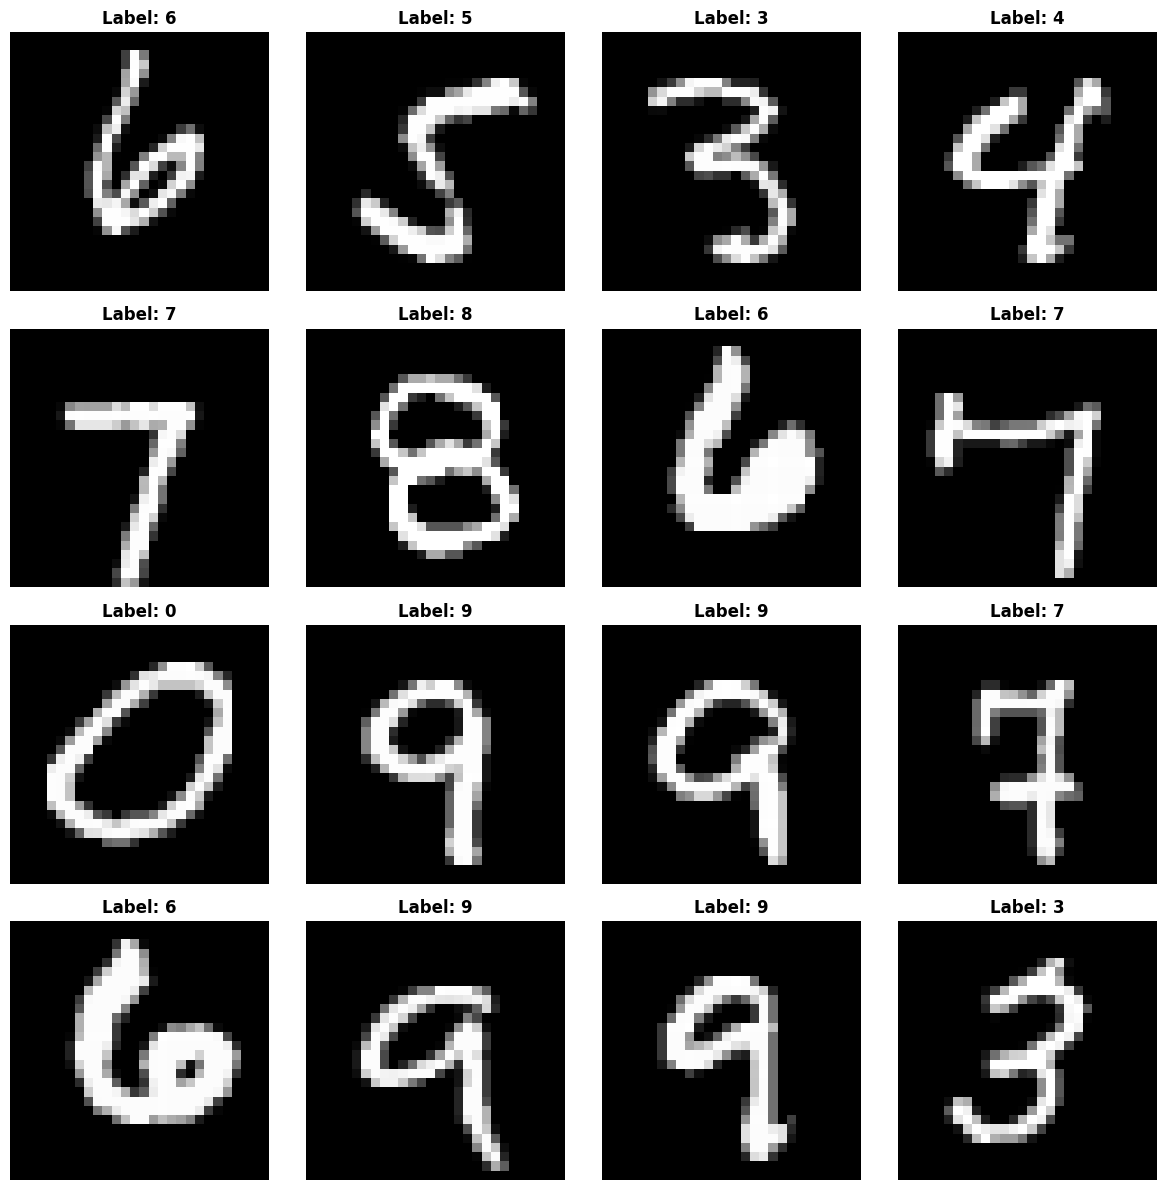

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train, X_val, y_train, and y_val defined and preprocessed

# Example plot for the first sample
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Assuming images are grayscale
    label_index = np.argmax(y_train[i])  # Extract the index of the maximum value
    ax.set_title(f'Label: {label_index}', fontweight="bold")  # Set the title with the label index
    ax.axis('off')

plt.tight_layout()
plt.show()


# building architecture

In [12]:
#Defining the model
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,922 (1.35 MB)

 Trainable params: 354,922 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

### training the model

In [13]:
checkpoint_callback = ModelCheckpoint('/kaggle/working/model_checkpoint_youssef.keras',
                                      monitor='val_loss',  # Save based on validation loss
                                      save_best_only=True,  # Save only the best model
                                      verbose=1)

In [14]:
#Compiling and model training with batch size = 64, epochs = 100, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)
# Train the model with early stopping based on best validation accuracy

model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=32, epochs=40, 
          validation_data=(X_val, y_val), callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/40


2024-04-03 13:43:52.755887: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-04-03 13:43:52.755935: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-04-03 13:43:52.755945: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-04-03 13:43:52.755953: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-04-03 13:43:52.755978: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-04-03 13:43:52.755986: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-04-03 13:43:52.755995: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-04-03 13:43:52.756003: E external/local_xla/xla/se

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1272 - loss: 2.2862

I0000 00:00:1712151836.785777    3501 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.7817

2024-04-03 13:44:01.393922: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-04-03 13:44:01.393971: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-04-03 13:44:01.393980: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-04-03 13:44:01.393988: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-04-03 13:44:01.393996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-04-03 13:44:01.394003: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-04-03 13:44:01.394011: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-04-03 13:44:01.394019: E external/local_xla/xla/ser


Epoch 1: val_loss improved from inf to 0.06762, saving model to /kaggle/working/model_checkpoint_youssef.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7302 - loss: 0.7747 - val_accuracy: 0.9802 - val_loss: 0.0676
Epoch 2/40
1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.0924
Epoch 2: val_loss improved from 0.06762 to 0.05310, saving model to /kaggle/working/model_checkpoint_youssef.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9709 - loss: 0.0924 - val_accuracy: 0.9842 - val_loss: 0.0531
Epoch 3/40
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0655
Epoch 3: val_loss improved from 0.05310 to 0.04194, saving model to /kaggle/working/model_checkpoint_youssef.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9810 - loss: 0.0655 - val_accuracy: 0.9867 - val_loss: 0.0419
Epoch 4/40
1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0495
Epoch 4: val_loss improved from 0.0

# load the model to test it 

In [15]:
model = load_model('/kaggle/working/model_checkpoint_youssef.keras')

In [16]:
results = model.predict(X_test)

# Select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [17]:
print(results)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [18]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("youssef_submission.csv",index=False)

In [19]:
submission = pd.read_csv('/kaggle/working/youssef_submission.csv')
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


# test the model on extranl photo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


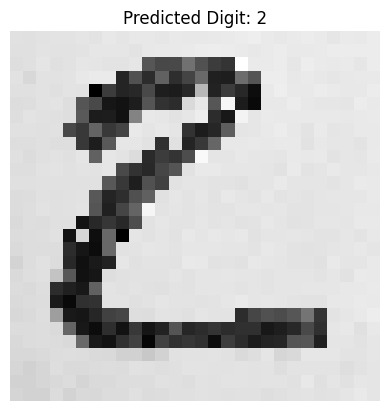

Predicted Digit: 2


In [37]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('/kaggle/working/model_checkpoint_youssef.keras')

# Load and preprocess the new image
img_path = '/kaggle/input/numbers-test/photo_2024-04-03_16-19-35.jpg'
img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make sure the image shape matches your model's input shape
assert img_array.shape == (1, 28, 28, 1), "Image shape mismatch"

# Make predictions
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

# Display the image and predicted digit
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

print("Predicted Digit:", predicted_digit)


> # ***End***